# Curvatures

In [1]:
import os
import numpy as np
from matplotlib import cm

In [2]:
from tinymesh import Mesh, get_principal_curvatures_with_derivatives
from viewer import Viewer

## Load mesh file

In [3]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "torus.ply")
mesh = Mesh(filename)
mesh.fill_holes()

## Compute vertex normals

In [4]:
nv = mesh.num_vertices()
normals = np.zeros((nv, 3))
for i in range(nv):
    v = mesh.vertex(i)
    normals[i] = v.normal()

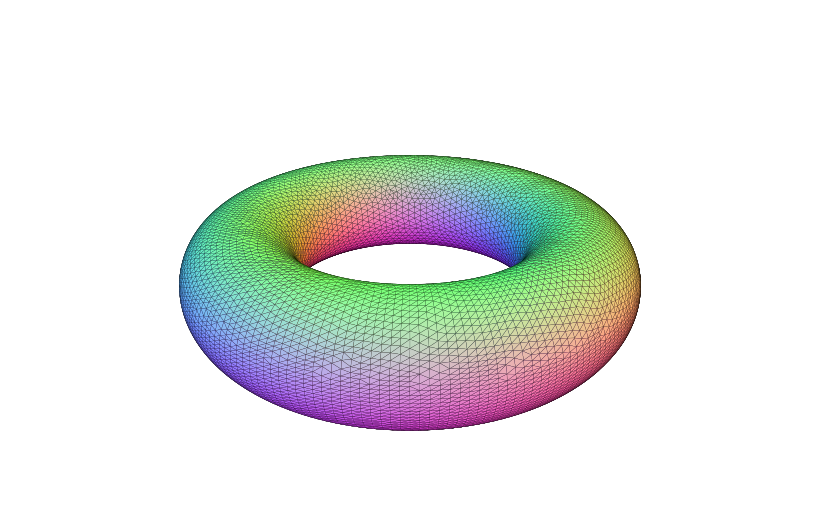

In [5]:
viewer = Viewer(800, 500)
viewer.lookat(7, 5, 7, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh, colors=normals * 0.5 + 0.5, wireframe=True, shade=False)

## Meyer et al. 2003
Reference: Meyer et al., "Discrete Differential-Geometry Operators for Triangulated 2-Manifolds"

In [6]:
nv = mesh.num_vertices()
Hs = np.zeros(nv)
Ks = np.zeros(nv)
for i in range(nv):
    v = mesh.vertex(i)
    Hs[i] = v.H()
    Ks[i] = v.K()

### Gaussian curvature

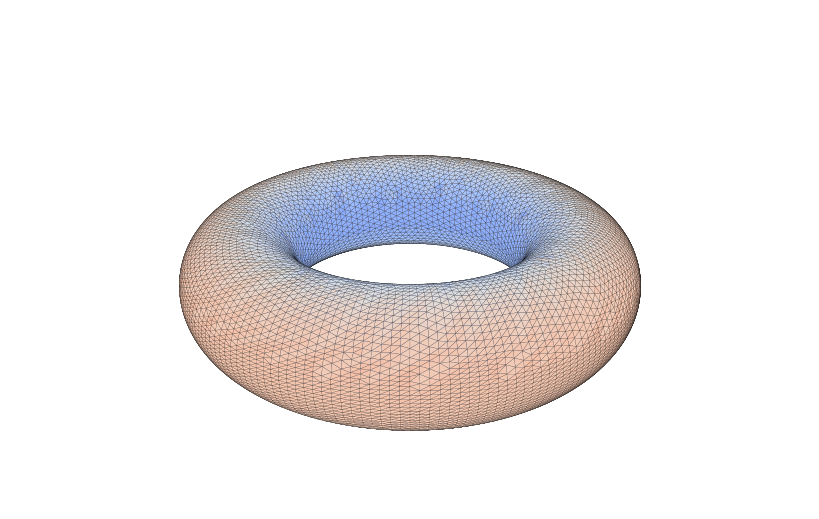

In [7]:
colorK = cm.coolwarm(np.clip(Ks, -1.0, 1.0) * 0.5 + 0.5)
viewer.mesh_visualization(mesh, colors=colorK, wireframe=True, shade=False)

### Mean curvature

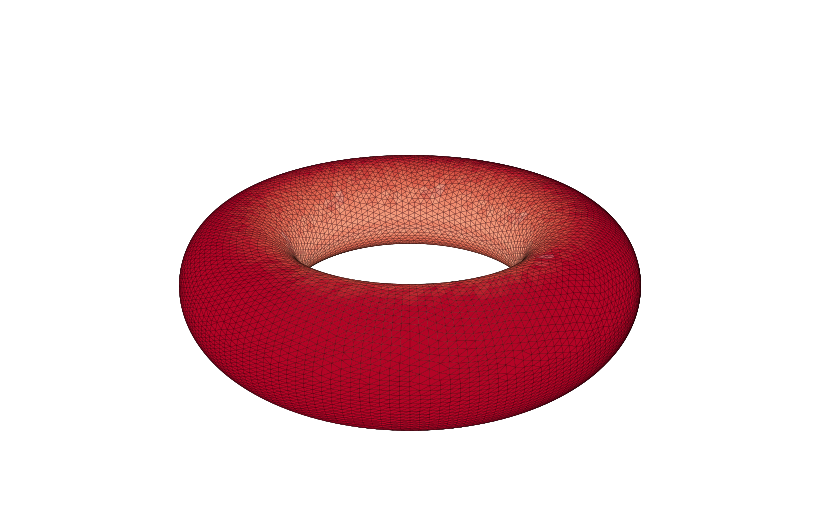

In [8]:
colorH = cm.coolwarm(np.clip(Hs, -1.0, 1.0) * 0.5 + 0.5)
viewer.mesh_visualization(mesh, colors=colorH, wireframe=True, shade=False)

### Principal curvatures

In [9]:
k_min = Hs - np.sqrt(np.maximum(0.0, Hs * Hs - Ks))
k_max = Hs + np.sqrt(np.maximum(0.0, Hs * Hs - Ks))

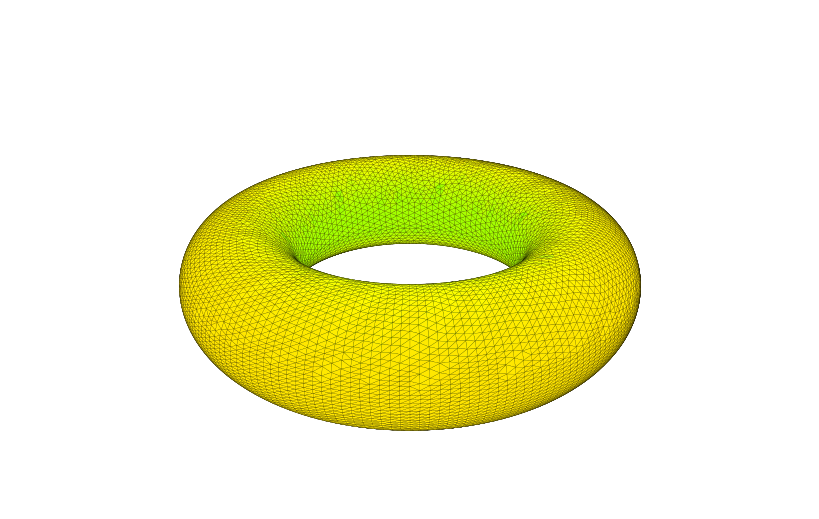

In [10]:
colorP = np.stack([np.ones_like(k_max)] * 4, axis=-1)
c0 = np.clip(k_min, -1.0, 1.0)
c1 = np.clip(k_max, -1.0, 1.0)
r_mask = np.logical_and(c0 >= 0.0, c1 >= 0.0)
g_mask = np.logical_and(c0 < 0.0, c1 >= 0.0)
b_mask = np.logical_and(c0 < 0.0, c1 < 0.0)
colorP[r_mask, 1] = 1.0 - np.abs(c0[r_mask])
colorP[r_mask, 2] = 1.0 - np.abs(c1[r_mask])
colorP[g_mask, 0] = 1.0 - np.abs(c0[g_mask])
colorP[g_mask, 2] = 1.0 - np.abs(c1[g_mask])
colorP[b_mask, 0] = 1.0 - np.abs(c0[b_mask])
colorP[b_mask, 1] = 1.0 - np.abs(c1[b_mask])
viewer.mesh_visualization(mesh, colors=colorP, wireframe=True, shade=False)

## Rusinkiewicz et al. 2004
Reference: Rusinkiewicz, "Estimating Curvature and Their Derivatives on Triangle Meshes"

In [11]:
k_max, k_min, e_max, e_min, t_max, t_min = get_principal_curvatures_with_derivatives(mesh, smooth_tensors=True)

In [12]:
Ks = k_min * k_max
Hs = 0.5 * (k_min + k_max)

### Gaussian curvature

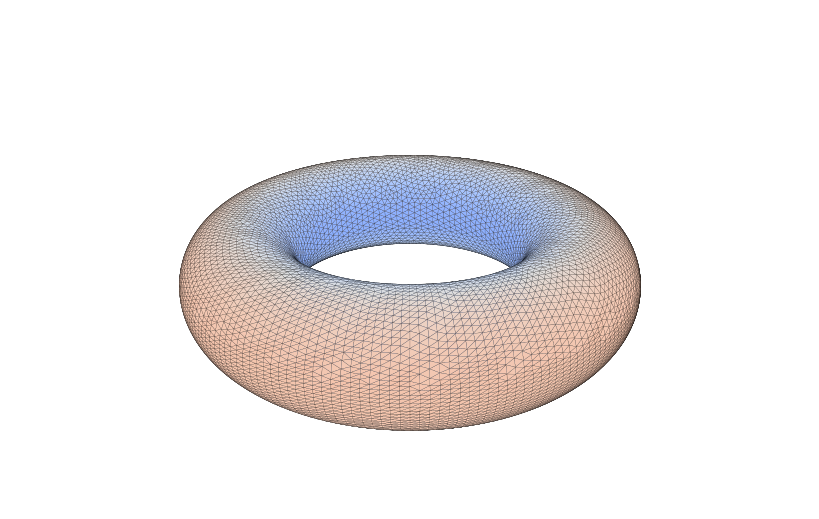

In [13]:
colorK = cm.coolwarm(np.clip(Ks, -1.0, 1.0) * 0.5 + 0.5)
viewer.mesh_visualization(mesh, colors=colorK, wireframe=True, shade=False)

### Mean curvature

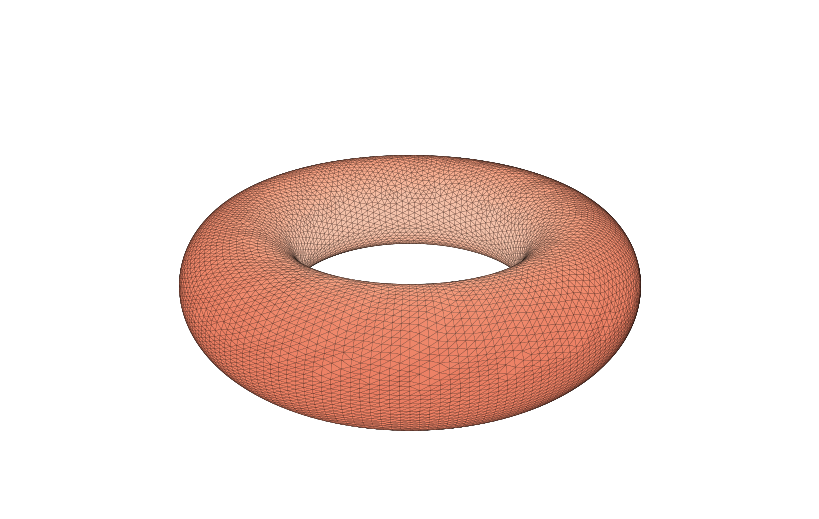

In [14]:
colorH = cm.coolwarm(np.clip(Hs, -1.0, 1.0) * 0.5 + 0.5)
viewer.mesh_visualization(mesh, colors=colorH, wireframe=True, shade=False)

### Principal curvatures

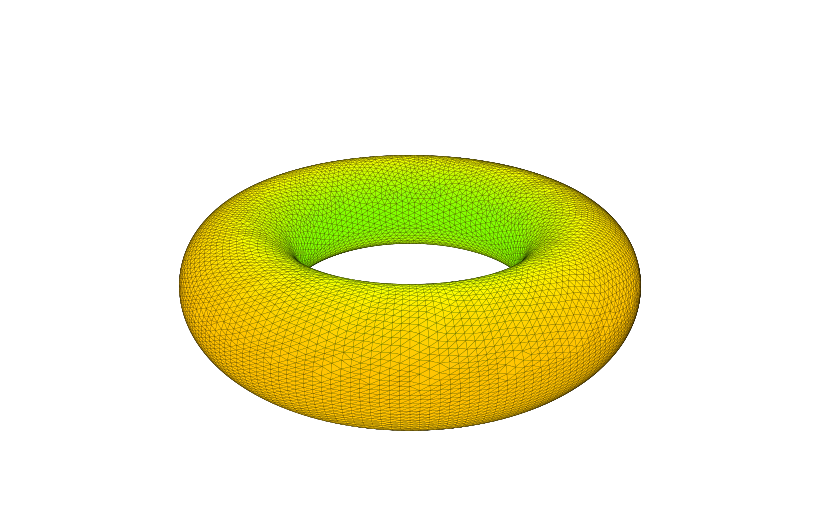

In [15]:
colorP = np.stack([np.ones_like(k_max)] * 4, axis=-1)
c0 = np.clip(k_min, -1.0, 1.0)
c1 = np.clip(k_max, -1.0, 1.0)
r_mask = np.logical_and(c0 >= 0.0, c1 >= 0.0)
g_mask = np.logical_and(c0 < 0.0, c1 >= 0.0)
b_mask = np.logical_and(c0 < 0.0, c1 < 0.0)
colorP[r_mask, 1] = 1.0 - np.abs(c0[r_mask])
colorP[r_mask, 2] = 1.0 - np.abs(c1[r_mask])
colorP[g_mask, 0] = 1.0 - np.abs(c0[g_mask])
colorP[g_mask, 2] = 1.0 - np.abs(c1[g_mask])
colorP[b_mask, 0] = 1.0 - np.abs(c0[b_mask])
colorP[b_mask, 1] = 1.0 - np.abs(c1[b_mask])
viewer.mesh_visualization(mesh, colors=colorP, wireframe=True, shade=False)

### Maximal curvature orientation

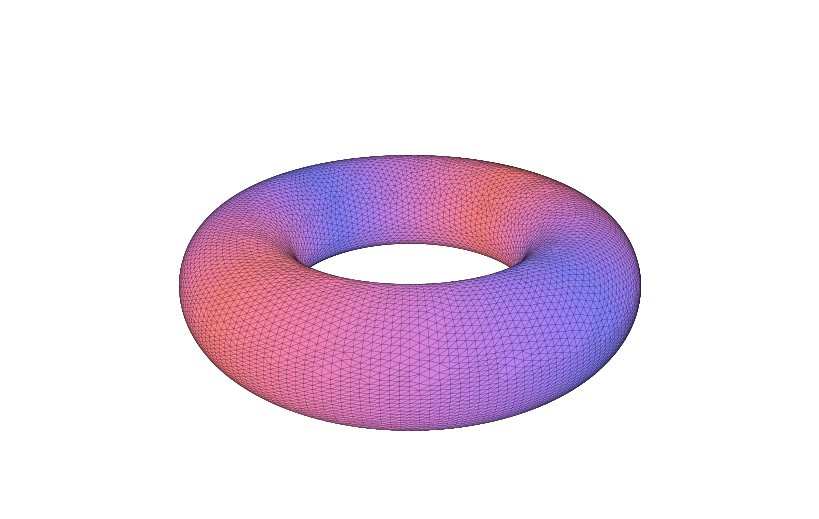

In [16]:
nv = len(t_max)
colorTmax = np.concatenate([np.abs(t_max) * 0.5 + 0.5, np.ones((nv, 1))], axis=-1)
viewer.mesh_visualization(mesh, colors=colorTmax, wireframe=True, shade=False)

### Minimal curvature orientation

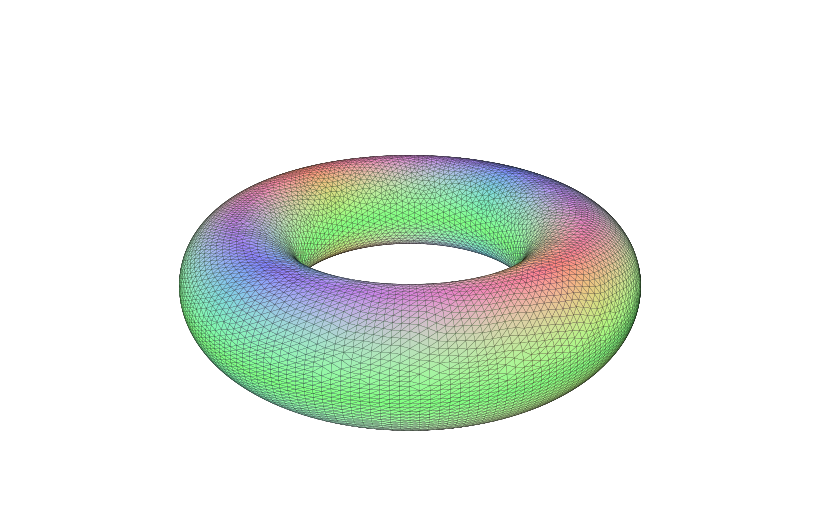

In [17]:
nv = len(t_min)
colorTmin = np.concatenate([np.abs(t_min) * 0.5 + 0.5, np.ones((nv, 1))], axis=-1)
viewer.mesh_visualization(mesh, colors=colorTmin, wireframe=True, shade=False)

### Curvature derivatives

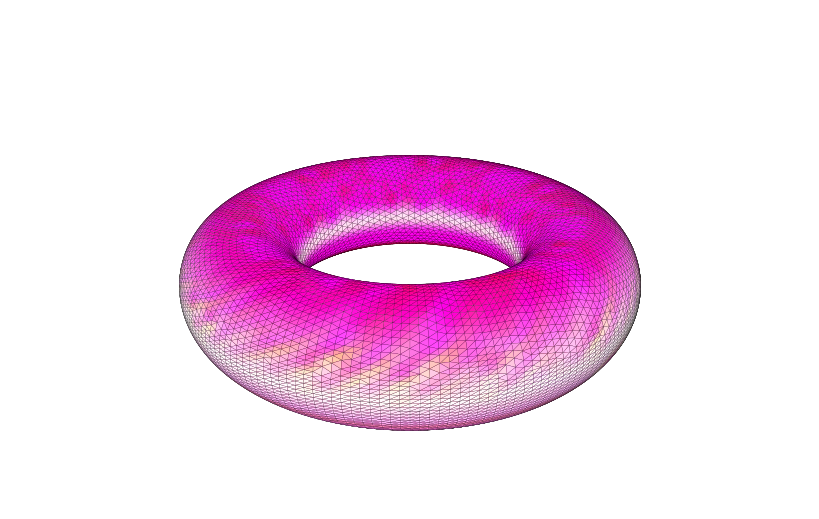

In [18]:
colorP = np.stack([np.ones_like(k_max)] * 4, axis=-1)
c0 = np.clip(e_min * 4.0, -1.0, 1.0)
c0 = np.clip(np.abs(e_min) * 4.0, -1.0, 1.0)
c1 = np.clip(e_max * 4.0, -1.0, 1.0)
c1 = np.clip(np.abs(e_max) * 4.0, -1.0, 1.0)
r_mask = np.logical_and(c0 >= 0.0, c1 >= 0.0)
g_mask = np.logical_and(c0 < 0.0, c1 >= 0.0)
b_mask = np.logical_and(c0 < 0.0, c1 < 0.0)
colorP[r_mask, 1] = 1.0 - np.abs(c0[r_mask])
colorP[r_mask, 2] = 1.0 - np.abs(c1[r_mask])
colorP[g_mask, 0] = 1.0 - np.abs(c0[g_mask])
colorP[g_mask, 2] = 1.0 - np.abs(c1[g_mask])
colorP[b_mask, 0] = 1.0 - np.abs(c0[b_mask])
colorP[b_mask, 1] = 1.0 - np.abs(c1[b_mask])
viewer.mesh_visualization(mesh, colors=colorP, wireframe=True, shade=False)